In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [8]:
NUM_DATASIZES = 10
NUM_MODELS = 5

datasizes = np.linspace(5000, 3000, NUM_DATASIZES).astype('int')
# Datasize 15: [5000, 4857, 4714, 4571, 4428, 4285, 4142, 4000, 3857, 3714, 3571, 3428, 3285, 3142, 3000]
# Datasize 10: [5000, 4777, 4555, 4333, 4111, 3888, 3666, 3444, 3222, 3000]
# Datasize 8: [5000, 4714, 4428, 4142, 3857, 3571, 3285, 3000])

BASE_PATH = 'cached/accuracies'
TEST_NAME = 'resnet_no_avg_v2'
PROGRESS_DIR_NAME = 'prog'

RAND_PATH = f'./{BASE_PATH}/{TEST_NAME}/rand_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
RAND_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/rand'
RAND_2_PATH = f'./{BASE_PATH}/{TEST_NAME}/rand_2_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
HIGH_PATH = f'./{BASE_PATH}/{TEST_NAME}/high_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
HIGH_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/high'
LOW_PATH = f'./{BASE_PATH}/{TEST_NAME}/low_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
LOW_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/low'
RATIO_LOW_PATH = f'./{BASE_PATH}/{TEST_NAME}/ratio_low_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
RATIO_HIGH_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/ratio_high'
RATIO_HIGH_PATH = f'./{BASE_PATH}/{TEST_NAME}/ratio_high_acc_{NUM_DATASIZES}ds_{NUM_MODELS}m'
RATIO_LOW_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/ratio_low'
JACOBIAN_REDUCTION_PATH = f'./{BASE_PATH}/{TEST_NAME}/jacobian_{NUM_DATASIZES}ds_{NUM_MODELS}m'
JACOBIAN_REDUCTION_PROG_PATH = f'./{BASE_PATH}/{TEST_NAME}/{PROGRESS_DIR_NAME}/jacobian'

OLD_AVERAGE_PATH = './cached/output_curv/cifar_output_curv_AVG'
NEW_AVERAGE_PATH = './cached/output_curv/cifar_output_curv_AVG_15'

OUTPUT_CURV_PATH = './cached/output_curv/cifar_output_curv_Ding2020MMA'
INPUT_CURV_PATH = 'cached/cifar_input_curv'
JACOBIAN_PATH = './cached/cifar_jacobians'

In [9]:
def plot_accuracies(accuracies: list[float], names: list[str]=None):
  plt.figure(figsize=(14, 10))
  for acclist in accuracies:
    plt.plot(np.linspace(100, 100 * datasizes[-1] / datasizes[0], datasizes.shape[0]).round().astype('int'), np.mean(acclist, axis=1))

  if names is not None:
    plt.legend(names, fontsize=11)

  plt.xlabel('Percentage of Dataset Used in Training (%)')
  plt.ylabel(f'Average Model Accuracy (n={NUM_MODELS})')
  plt.grid()
  plt.gca().invert_xaxis()
  plt.show()

In [10]:
# import accuracy curves
with open(RAND_PATH, 'rb') as file:
  rand = pickle.load(file)
  file.close()
with open(HIGH_PATH, 'rb') as file:
  high = pickle.load(file)
  file.close()
with open(LOW_PATH, 'rb') as file:
  low = pickle.load(file)
  file.close()
with open(RATIO_LOW_PATH, 'rb') as file:
  ratio_low = pickle.load(file)
  file.close()
with open(RATIO_HIGH_PATH, 'rb') as file:
  ratio_high = pickle.load(file)
  file.close()
with open(JACOBIAN_REDUCTION_PATH, 'rb') as file:
  jacobian = pickle.load(file)
  file.close()

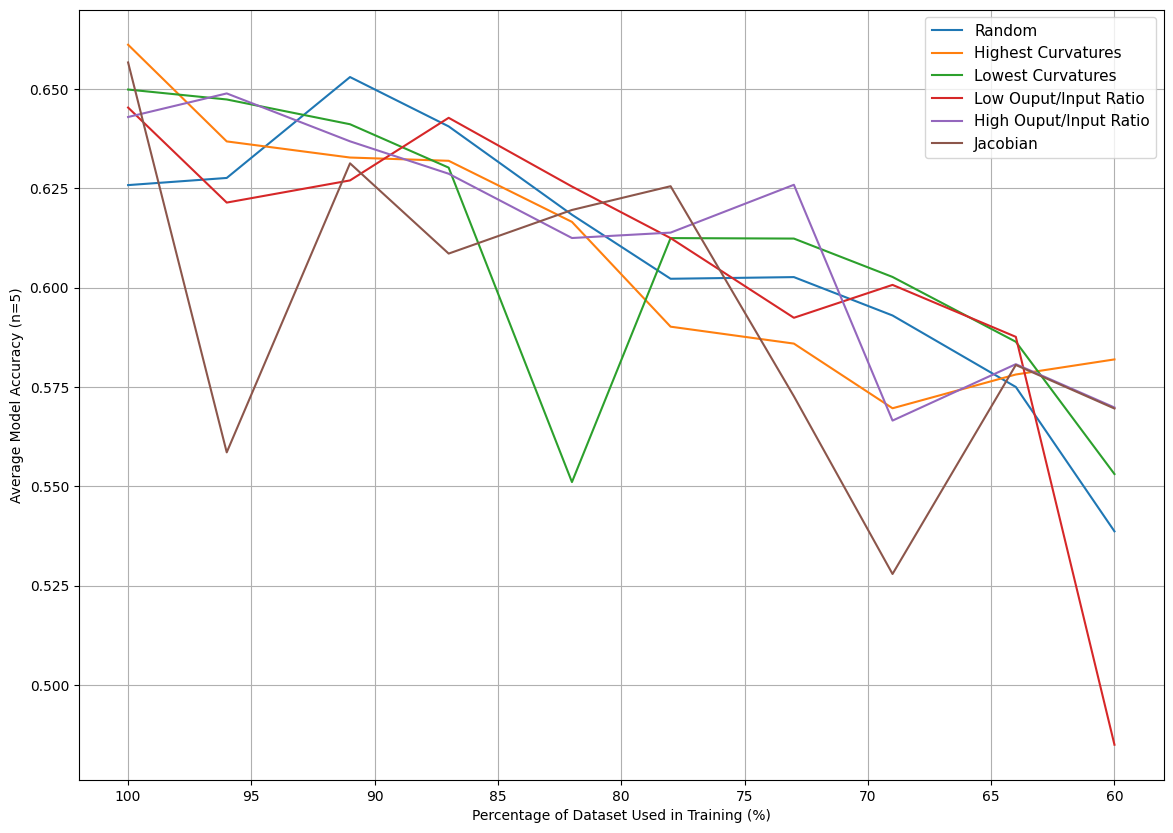

In [11]:
namelist = ['Random', 'Highest Curvatures', 'Lowest Curvatures', 'Low Ouput/Input Ratio', 'High Ouput/Input Ratio', 'Jacobian']
plot_accuracies([rand, high, low, ratio_low, ratio_high, jacobian], namelist)